# CPSC4810 Data Wrangling Project
#### Leo Liang
#### Qirui Cao
#### Latesh Subramanayam

# Project objectives and description

(Data sources:)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as mcol
import matplotlib.cm as cm

import plotly.express as px

from PIL import Image

## Section 1 Data Inspection and Cleaning

(description data sources for each dataset:)

### Inspect the county data set

In [ ]:
dfCounty = pd.read_csv("data/us_county.csv")

In [ ]:
dfCounty.head(5)

In [ ]:
print("County dataset has", dfCounty.shape[0], "rows and", dfCounty.shape[1], "columns in the dataset.")

In [ ]:
print("The number of rows in the dataset is equal to the number of unique values in column 'fips':", 
      len(dfCounty) == dfCounty.fips.nunique())

Since the number of rows of the dataframe is equal to the number of unique values for variable "fips". We can consider the column "fips" as the key of the dataframe. That is, each row in dataframe dfCounty represents a different US county. 

In [ ]:
dfCounty.isnull().sum()

Then, by running the total number of missing values for each variable, we find out that there are 79 missing values for "state_code". Then we need to check those rows containing missing values. 

In [ ]:
dfCounty[dfCounty.state_code.isnull()]['state'].value_counts()

In [ ]:
print("Puerto Rico has", len(dfCounty[dfCounty.state == "Puerto Rico"]), "rows in the dataframe. ")

In [ ]:
print("District of Columbia", len(dfCounty[dfCounty.state == "District of Columbia"]), "rows in the dataframe")

We find out that the only two states which do not have a state code are Puerto Rico and District of Columbia. By comparing the number of rows for two states, and the number of missing value occurance, we can be sure that state Puerto Rico and District of Columbia do not have state code. 

This is because both areas are not a US state, then they do not have a US state code. Since Puerto Rico is not part of 50 states + 1 disctrict, we exclude those observations from the project. 

In [ ]:
dfCounty = dfCounty.drop(dfCounty[dfCounty.state == "Puerto Rico"].index)
print("The number of unique states in the dataframe: ", dfCounty.state.nunique())
dfCounty.state.unique()

Then, we aggregate the population by all states to replicate the raw dataframe with state-level information.  

In [ ]:
state_pop = pd.DataFrame(dfCounty.groupby('state')[['male','female','population']].sum())
state_pop["female_proportion"] = state_pop.female/state_pop.population
state_pop.reset_index(level=0, inplace=True)
state_pop.head()

### Inspect the Poverty data 

In [ ]:
dfPoverty = pd.read_csv("data/PovertyEstimates_us_county.csv")

In [ ]:
dfPoverty.head(5)

In [ ]:
dfPoverty.columns

Then, we altered the dataset to keep the relevant columns.

In [ ]:
dfPoverty = dfPoverty[['FIPStxt', 'Stabr', 'Area_name', 'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013', 
                        'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018', 'MEDHHINC_2018']]

In [ ]:
print("Poverty dataset has", dfPoverty.shape[0], "rows and", dfPoverty.shape[1], "columns in the dataset.")

In [ ]:
print("The number of rows in the dataset is equal to the number of unique values in column 'fips':", 
      len(dfPoverty) == dfPoverty["FIPStxt"].nunique())

Similarly, since the number of rows of the dataframe is equal to the number of unique values for variable "FIPStxt". We can consider the column "FIPStxt" as the key of the dataframe. That is, each row in dataframe dfCounty represents a different US area. 

In [ ]:
dfPoverty.isnull().sum()

Then, by running the total number of missing values for each variable, we find out that there are 52 missing values for 2013's "RUCC" and "UIC". Then we need to check those rows containing missing values.

In [ ]:
dfPoverty[dfPoverty["Rural-urban_Continuum_Code_2013"].isna()]["Area_name"]

In [ ]:
dfPoverty[dfPoverty["Urban_Influence_Code_2013"].isna()]["Area_name"]

By observing the missing values in both columns, the corresponding area names are states and US itself. The missing values are due to the fact that the country US itself and states are not applied to the county-level code, as it only applies to counties. 

Meanwhile, Rural-urban Continuum Code 2013 and Urban Influence Code 2013 are all categorical variables, which have their corresponding categories. (Please see documents below) Then, we need to map the code to their corresponding description. 

Rural-Urban Continuum Code: https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/documentation/
Urban Influence Code: https://www.ers.usda.gov/data-products/urban-influence-codes/documentation.aspx.

In [ ]:
im1 = Image.open("data/RUCC.png") 
im1

In [ ]:
im2 = Image.open("data/UIC.png") 
im2

In [ ]:
RUCC = {1: "Level 1", 
           2: "Level 2",
           3: "Level 3",
           4: "Level 4",
           5: "Level 5",
           6: "Level 6", 
           7: "Level 7", 
           8: "Level 8",
           9: "Level 9"
          }

UIC = {1: "Level 1",
       2: "Level 2",
       3: "Level 3",
       4: "Level 4",
       5: "Level 5",
       6: "Level 6",
       7: "Level 7",
       8: "Level 8",
       9: "Level 9",
       10: "Level 10",
       11: "Level 11",
       12: "Level 12",
       }

dfPoverty["Rural-urban_Continuum_Code_2013"] = dfPoverty["Rural-urban_Continuum_Code_2013"].map(RUCC)
dfPoverty["Urban_Influence_Code_2013"] = dfPoverty["Urban_Influence_Code_2013"].map(UIC)

In [ ]:
dfPoverty.head(5)

In [ ]:
dfPoverty.describe()

### Inspect COVID case and death data

In [ ]:
dfcovCnty = pd.read_csv("data/covid_us_county.csv")

In [ ]:
dfcovCnty.head(5)

In [ ]:
print("COVID dataset has", dfcovCnty.shape[0], "rows and", dfcovCnty.shape[1], "columns in the dataset.")

This data contains the county-level cumulative cases and deaths starting from January 22nd, 2020. Let's take the current date, and inspect the missing values

In [ ]:
dfcovCnty_current = dfcovCnty[dfcovCnty['date'] == '2021-07-30']
dfcovCnty_current.head()

In [ ]:
print("current date COVID dataset has", dfcovCnty_current.shape[0], "rows and", dfcovCnty_current.shape[1], "columns in the dataset.")

In [ ]:
dfcovCnty_current.isnull().sum()

There are 10 missing values in column "fips", 6 in column "county" and 89 in column "state_code". We need to check all the rows containing these missing values. 

In [ ]:
dfcovCnty_current[dfcovCnty_current.fips.isnull()]

Since in the merging stage of our project, we will merge by fips, which is the key column for most of our county-level dataframe, we will remove those rows containing missing values in fips. 

In [ ]:
dfcovCnty_current[dfcovCnty_current.county.isnull()]

Since the missing values in county indicates two cruise ships and four areas outside 50 states + 1 district, we remove those rows as well. 

In [ ]:
dfcovCnty=dfcovCnty.dropna(subset=['fips','county'])
dfcovCnty_current=dfcovCnty_current.dropna(subset=['fips','county'])

Then, we checked the rows with missing state codes, and found out that only Puerto Rico and District of Columbia don't have state code. It is the same case as the previous situation where both areas are not a US state, thus there are no state codes. And we removed rows with Puerto Rico as well.

In [ ]:
dfcovCnty_current[dfcovCnty_current.state_code.isnull()].state.value_counts()

In [ ]:
print("Puerto Rico has", len(dfcovCnty_current[dfcovCnty_current.state == "Puerto Rico"]), "rows in the dataframe. ")

In [ ]:
print("District of Columbia", len(dfcovCnty_current[dfcovCnty_current.state == "District of Columbia"]), "rows in the dataframe")

In [ ]:
dfcovCnty = dfcovCnty.drop(dfcovCnty[dfcovCnty.state == "Puerto Rico"].index)
dfcovCnty_current = dfcovCnty[dfcovCnty.date == '2021-07-30']
print("The number of unique states in the original dataset is:", dfcovCnty.state.nunique())
dfcovCnty.state.unique()

In [ ]:
dfcovCnty.isnull().sum()

In [ ]:
dfcovCnty[dfcovCnty.state_code.isnull()].state.value_counts()

In [ ]:
print("Now, the number of rows in the dataset is equal to the number of unique values in column 'fips':", 
      len(dfcovCnty_current) == dfcovCnty_current.fips.nunique())

Since the number of rows of the dataframe is equal to the number of unique values for variable "fips". We can consider the column "fips" as the key of the dataframe. That is, each row in dataframe current represents a different US county.

In [ ]:
dfcovCnty_current.describe()

Similar to the county data, we also aggregated the cumulative cases and deaths by state level to replicate the dataframe. 

In [ ]:
dfcovSt = pd.DataFrame(dfcovCnty.groupby(["state", "date"])[["cases", "deaths"]].sum())
dfcovSt.reset_index(inplace=True)
dfcovSt

In [ ]:
dfcovSt_current = dfcovSt[dfcovSt.date == "2021-07-30"]
dfcovSt_current

### Inspect the Vaccination Data

In [ ]:
dfvac = pd.read_csv("data/us_state_vaccinations.csv")

In [136]:
dfvac.head()

,date,location,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million
0,2021-01-12,Alabama,70861.0,0.15,1.59,7270.0,1.45,NaN,NaN
1,2021-01-13,Alabama,74792.0,0.19,1.71,9245.0,1.53,5906.0,1205.0
2,2021-01-14,Alabama,80480.0,NaN,1.88,NaN,1.64,7083.0,1445.0
3,2021-01-15,Alabama,86956.0,0.28,2.05,13488.0,1.77,7478.0,1525.0
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0


In [ ]:
print("Vaccine dataset has", dfvac.shape[0], "rows and", dfvac.shape[1], "columns in the dataset.")

Since the dataset contains the time series state level data of US vaccination, we subsetted the current date as an example to examine the data.

In [ ]:
dfvac_current = dfvac[dfvac.date == '2021-07-30']
dfvac_current.head()

In [ ]:
dfvac_current.isnull().sum()

Looking at the unique locations, we will only be keeping the states and the capital city

In [ ]:
dfvac_current.location.unique()

Only location where it is a state will be kept, and also we need to change New York State to New York in order to match with other datasets. 

In [ ]:
dfvac_current = dfvac_current[~dfvac_current.location.isin(['American Samoa','Bureau of Prisons','Dept of Defense','Federated States of Micronesia',
               'Indian Health Svc','Long Term Care','Marshall Islands','Northern Mariana Islands',
               'Puerto Rico', 'Republic of Palau','United States','Veterans Health','Guam','Virgin Islands'])]
dfvac_current.location[dfvac_current.location == "New York State"] = "New York"
dfvac_current.location.nunique()

Similarly, we removed those locations from the time series dataframe as well. 

In [ ]:
dfvac = dfvac[~dfvac.location.isin(['American Samoa','Bureau of Prisons','Dept of Defense','Federated States of Micronesia',
               'Indian Health Svc','Long Term Care','Marshall Islands','Northern Mariana Islands',
               'Puerto Rico', 'Republic of Palau','United States','Veterans Health','Guam','Virgin Islands'])]
dfvac.location[dfvac.location == "New York State"] = "New York"
dfvac.location.nunique()

checking for missing values again. We do not have missing values anymore.

In [ ]:
dfvac_current.isnull().sum()

now we have the 50 states and the capital city in the data

In [ ]:
print("Now, the number of rows in the dataset is equal to the number of unique values in column 'location':", 
      len(dfvac_current) == dfvac_current.location.nunique())

Since the number of rows of the dataframe is equal to the number of unique values for variable "location". We can consider the column "location" as the key column of the dataframe. That is, each row in dataframe current represents a different US county.

In [ ]:
dfvac = dfvac[['date', 'location', 'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'daily_vaccinations',
       'daily_vaccinations_per_million']]

In [ ]:
dfvac_current = dfvac_current[['date', 'location', 'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'daily_vaccinations',
       'daily_vaccinations_per_million']]

Then, we included the relevant columns for merging and visualizing. 

## Section 2 Merge county-level data

#### Merge the current county-level data
Merge County info with covid cases by county (current only)

In [ ]:
mergeCounty = pd.merge(dfCounty, dfcovCnty_current, how='inner', on='fips', validate = "1:1")
mergeCounty.head(5)

Merge the above with poverty data

In [ ]:
mergeCouPov = pd.merge(mergeCounty, dfPoverty, how='inner', left_on='fips', right_on='FIPStxt', validate = "1:1")
mergeCouPov.head(5)

In [ ]:
mergeCouPov.isnull().sum()

Then we checked the missing values and found out that the missing values occur due to the fact that District of Columbia does not have a state code. 

In [ ]:
mergeCouPov[mergeCouPov.state_code_x.isnull()]

In [ ]:
mergeCouPov[mergeCouPov.state_code_y.isnull()]

Then, we removed some of the redundant columns and kept the rest.

In [ ]:
county_current = mergeCouPov[['fips', 'county_x', 'state_x', 'state_code_x', 'male', 'female',
       'median_age', 'population', 'female_percentage', 'lat_x', 'long_x', 'date', 'cases',
       'deaths', 'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018']]

In [ ]:
county_current.head(5)

#### Merge time series county-level data

In [ ]:
mergeCountyts = pd.merge(dfCounty, dfcovCnty, how='inner', on='fips', validate = "1:m")
mergeCountyts.head(5)

In [ ]:
mergeCouPovts = pd.merge(mergeCountyts, dfPoverty, how='inner', left_on='fips', right_on='FIPStxt', validate = "m:1")
mergeCouPovts.head(5)

In [ ]:
mergeCouPovts.isnull().sum()

In [ ]:
mergeCouPovts[mergeCouPovts.state_code_x.isnull()].county_x.unique()

In [ ]:
mergeCouPovts[mergeCouPovts.state_code_y.isnull()].county_x.unique()

Similarly, the missing values here are also due to District of Columbia not having a state code. 

In [ ]:
county_ts = mergeCouPovts[['fips', 'county_x', 'state_x', 'state_code_x', 'male', 'female',
       'median_age', 'population', 'female_percentage', 'lat_x', 'long_x', 'date', 'cases',
       'deaths', 'Rural-urban_Continuum_Code_2013', 'Urban_Influence_Code_2013',
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018']]

Also, we removed the redundant columns like the current data. 

In [ ]:
county_ts.head()

## Merge state-level data

#### Merge current state-level data

In [ ]:
mergeCovState = pd.merge(dfcovSt_current, state_pop, how='inner', on = 'state')
mergeCovState

In [ ]:
mergeCovStatePov = pd.merge(mergeCovState, dfPoverty, how = "inner", left_on = "state", right_on = "Area_name")
mergeCovStatePov

We found out that there are two observations of District of Columbia, thus we removed the second one. 

In [ ]:
mergeCovStatePov.drop(mergeCovStatePov[mergeCovStatePov.FIPStxt == 11001].index, inplace = True)
mergeCovStatePov

In [ ]:
mergeCovStatePovVac = pd.merge(mergeCovStatePov, dfvac_current, how = "left", left_on = "state", right_on = "location")
mergeCovStatePovVac

In [ ]:
mergeCovStatePovVac.columns

Similarly, we removed redundant columns and removed the RUCC and UIC which are only applied to counties.

In [ ]:
state_current = mergeCovStatePovVac[['state', 'date_x', 'cases', 'deaths', 'male', 'female', 'population',
       'female_proportion', 'FIPStxt', 'Stabr', 
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
       'people_fully_vaccinated', 'people_vaccinated_per_hundred',
       'daily_vaccinations', 'daily_vaccinations_per_million']]

In [ ]:
state_current.isnull().sum()

### Merge time series state-level data

In [ ]:
mergeCovStatets = pd.merge(dfcovSt, state_pop, how='inner', on = 'state')
mergeCovStatets.head()

In [ ]:
mergeCovStatePovts = pd.merge(mergeCovStatets, dfPoverty, how = "inner", left_on = "state", right_on = "Area_name")
mergeCovStatePovts.head()

In [ ]:
mergeCovStatePovts.drop(mergeCovStatePovts[mergeCovStatePovts.FIPStxt == 11001].index, inplace = True)
mergeCovStatePovts.head()

Here, we applied the left join, as the date of the previous dataframe ranges from Jan 2020 to current date, while the vaccination data includes from Jan 2021. We need to keep the cases/deaths data before Jan 2021.

In [ ]:
mergeCovStatePovVacts = pd.merge(mergeCovStatePovts, dfvac, how = "left", left_on = ["state", "date"], right_on = ["location", "date"])
mergeCovStatePovVacts

In [ ]:
mergeCovStatePovVacts.isnull().sum()

Due to the missing values in the vaccination data, we choose to backfill the missing values to avoid potential breaks in the plots. Also, we removed redundant columns as well.

In [ ]:
state_ts = mergeCovStatePovVacts[['state', 'date', 'cases', 'deaths', 'male', 'female', 'population',
       'female_proportion', 'FIPStxt', 'Stabr', 
       'POVALL_2018', 'PCTPOVALL_2018', 'POV017_2018', 'PCTPOV017_2018',
       'MEDHHINC_2018', 'people_vaccinated', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
       'people_fully_vaccinated', 'people_vaccinated_per_hundred',
       'daily_vaccinations', 'daily_vaccinations_per_million']]
state_ts.fillna(method = "bfill", inplace = True)

In [ ]:
state_ts.head()

## Section 3 Plot
### National level Cases, Deaths, Vaccination

First, we aggregate the state level time series data by dates to derive the national level data by date.

In [135]:
nation_ts = pd.DataFrame(state_ts.groupby('date')[['cases', 'deaths', 'people_fully_vaccinated', 'people_vaccinated']].sum())
nation_ts.reset_index(inplace = True)
nation_ts.fillna(method = "bfill", inplace = True)
nation_ts

,date,cases,deaths,people_fully_vaccinated,people_vaccinated
0,2020-01-22,1,1,820494.0,7334041.0
1,2020-01-23,1,1,820494.0,7334041.0
2,2020-01-24,2,1,820494.0,7334041.0
3,2020-01-25,2,1,820494.0,7334041.0
4,2020-01-26,5,1,820494.0,7334041.0
...,...,...,...,...,...
551,2021-07-26,34191481,606651,159856855.0,184710975.0
552,2021-07-27,34261690,607100,159994251.0,184974818.0
553,2021-07-28,34329502,607476,160265875.0,185466924.0
554,2021-07-29,34406569,607796,160535336.0,185904325.0


Then we subsetted the dataframe and derive the daily cases by differentiate the cumulative data. (also we smoothed out the cases and deaths for better visualization.)

In [132]:
natCaseDeath = nation_ts
natCaseDeath[['cases', 'deaths', 'people_fully_vaccinated', 'people_vaccinated']] = natCaseDeath[['cases', 'deaths', 'people_fully_vaccinated', 'people_vaccinated']].rolling(7).mean()
natCaseDeath.date = pd.to_datetime(natCaseDeath.date)
natCaseDeathDay = natCaseDeath.diff()
natCaseDeathDay['date'] = natCaseDeath['date']

In [ ]:
%matplotlib notebook

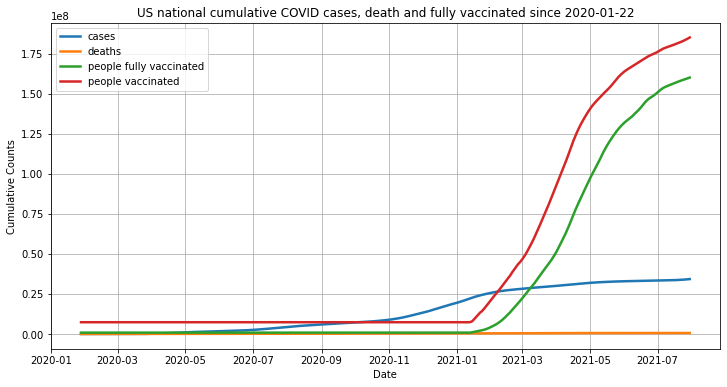

In [131]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("US national cumulative COVID cases, death and fully vaccinated since 2020-01-22")
sns.lineplot(data = natCaseDeath, x = "date", y = 'cases', palette="tab10", linewidth=2.5, label = 'cases')
sns.lineplot(data = natCaseDeath, x = "date", y = 'deaths', palette="tab10", linewidth=2.5, label = 'deaths')
sns.lineplot(data = natCaseDeath, x = "date", y = 'people_fully_vaccinated', palette="tab10", linewidth=2.5, label = 'people fully vaccinated')
sns.lineplot(data = natCaseDeath, x = "date", y = 'people_vaccinated', palette="tab10", linewidth=2.5, label = 'people vaccinated')
plt.grid(True)
ax.set(xlabel="Date", ylabel="Cumulative Counts")
plt.show()

Big increase in cases prior to intro of vaccines.


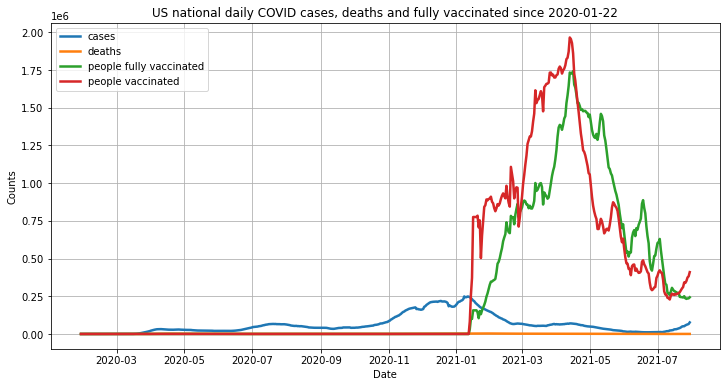

In [129]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("US national daily COVID cases, deaths and fully vaccinated since 2020-01-22")
sns.lineplot(data = natCaseDeathDay, x = "date", y = 'cases', palette="tab10", linewidth=2.5, label = 'cases')
sns.lineplot(data = natCaseDeathDay, x = "date", y = 'deaths', palette="tab10", linewidth=2.5, label = 'deaths')
sns.lineplot(data = natCaseDeathDay, x = "date", y = 'people_fully_vaccinated', palette="tab10", linewidth=2.5, label = 'people fully vaccinated')
sns.lineplot(data = natCaseDeathDay, x = "date", y = 'people_vaccinated', palette="tab10", linewidth=2.5, label = 'people vaccinated')
plt.grid(True)
ax.set(xlabel="Date", ylabel="Counts")
plt.show()

Intro of vaccine drastically decrease daily cases.

In [138]:
nation_cumulative_ts = pd.DataFrame(state_ts.groupby('date')[['cases', 'deaths', 'people_fully_vaccinated', 'people_vaccinated']].sum())
nation_daily_ts = nation_cumulative_ts.diff()

In [139]:
state_ts.loc[:,'casePer100'] = state_ts.cases/state_ts.population*100
state_ts.loc[:,'vacPer100'] = state_ts.people_fully_vaccinated/state_ts.population*100

/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
%matplotlib inline

ERROR! Session/line number was not unique in database. History logging moved to new session 78


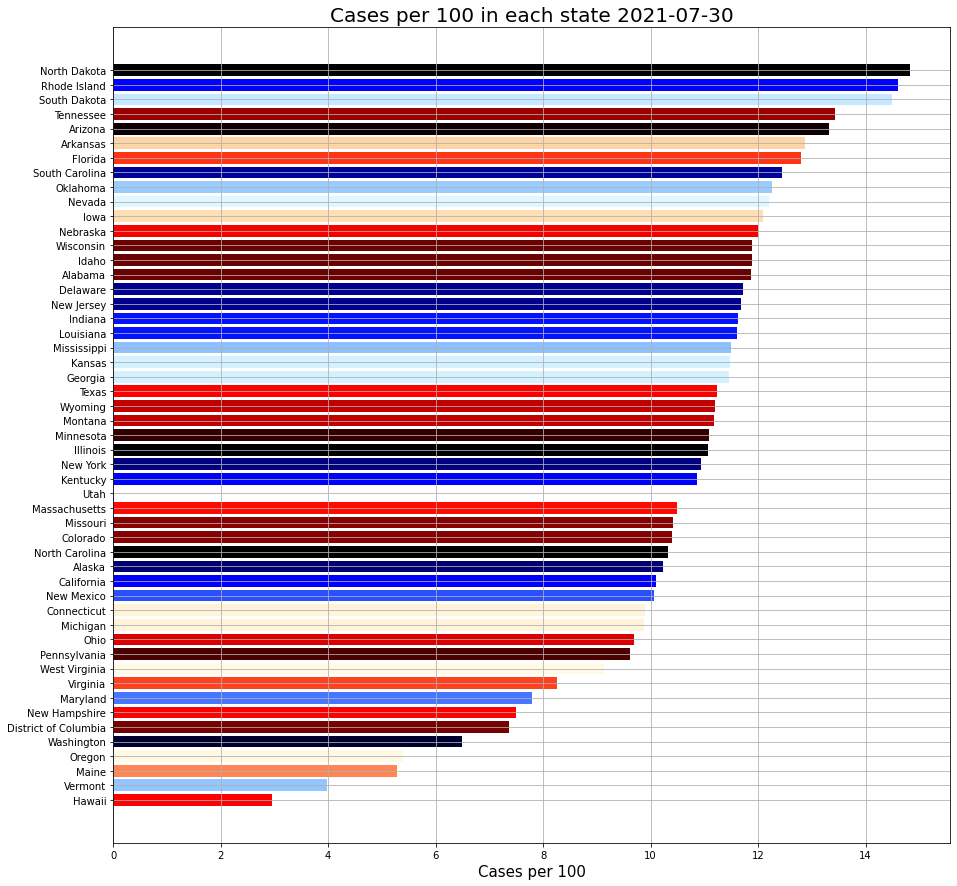

In [149]:
state_ts_curr = state_ts[state_ts.date == "2021-07-30"]
state_ts_curr_sorted = state_ts_curr.sort_values('casePer100')
x = state_ts_curr_sorted.state
y = state_ts_curr_sorted.casePer100
z = state_ts_curr.vacPer100

my_cmap = plt.get_cmap("flag")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.figure(figsize=(15,15))
plt.grid(True)
plt.barh(x, y, align='center', color = my_cmap(rescale(y)))
plt.xlabel('Cases per 100', fontsize = 15)
plt.title('Cases per 100 in each state 2021-07-30', fontsize = 20)

plt.show()

North Dakota currently has highest cases per 100 which is 5 times that of Hawaii.

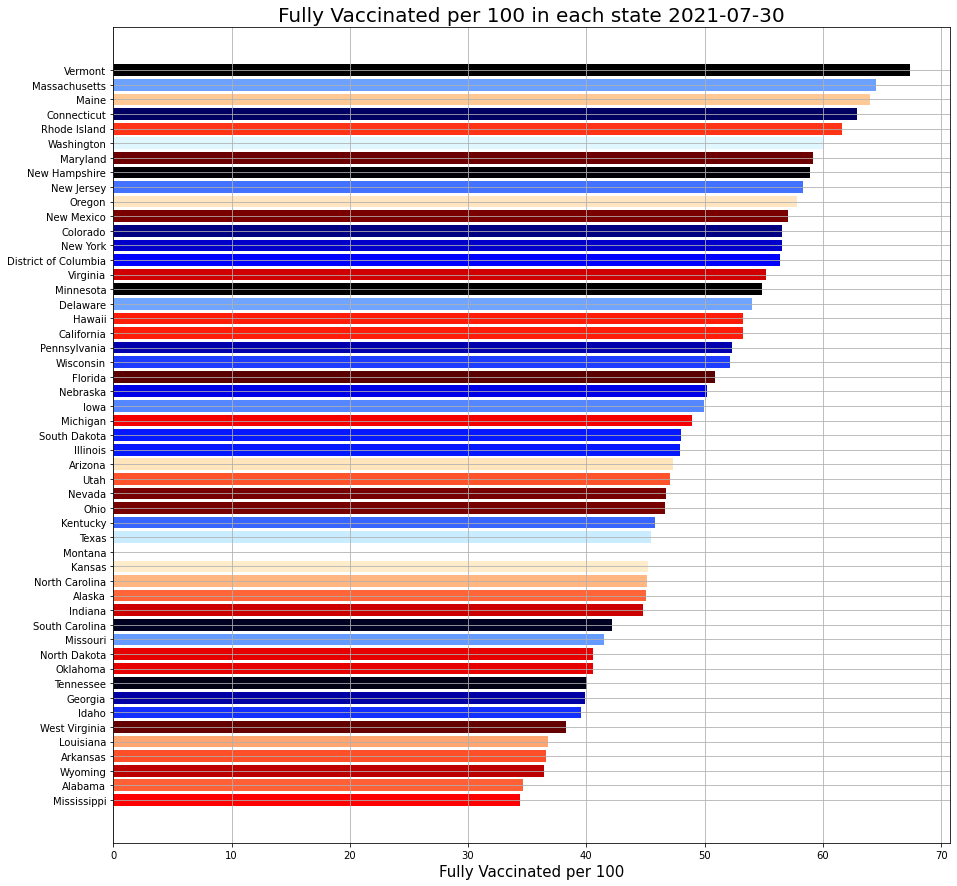

In [141]:
state_ts_curr_sorted = state_ts_curr.sort_values('vacPer100')
x = state_ts_curr_sorted.state
y = state_ts_curr_sorted.vacPer100

my_cmap = plt.get_cmap("flag")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.figure(figsize=(15,15))
plt.grid(True)
plt.barh(x, y, align='center', color = my_cmap(rescale(y)))
plt.xlabel('Fully Vaccinated per 100', fontsize = 15)
plt.title('Fully Vaccinated per 100 in each state 2021-07-30', fontsize = 20)

plt.show()

North-Eastern Us has relatively higher proportion of residents fully vaccinated.

In [144]:
#plt.figure(figsize=(12,6))
#groups = state_ts[state_ts.state == 'North Dakota'].groupby('state')
#for name, group in groups:
#    plt.plot(group.date, group.casePer100, linestyle='-', markersize=5, label=name, alpha = 0.5)
#plt.show()

In [145]:
county_current.loc[:,'cases100'] = county_current.loc[:,"cases"]/county_current.loc[:,"population"]*100
county_current.loc[:,'deaths100'] = county_current.loc[:,"deaths"]/county_current.loc[:,"population"]*100
county_current.loc[:,'deathratio'] = county_current.loc[:,"deaths"]/county_current.loc[:,"cases"]

/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
Metro = {"Level 1": "Metro", 
         "Level 2": "Metro",
         "Level 3": "Metro",
         "Level 4": "Adjacent to Metro",
         "Level 5": "Not adjacent to metro",
         "Level 6": "Adjacent to Metro", 
         "Level 7": "Not adjacent to metro",
         "Level 8": "Adjacent to Metro",
         "Level 9": "Not adjacent to metro"
          }

county_current["Metro"] = county_current["Rural-urban_Continuum_Code_2013"].map(Metro)

<ipython-input-146-054a06b46758>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



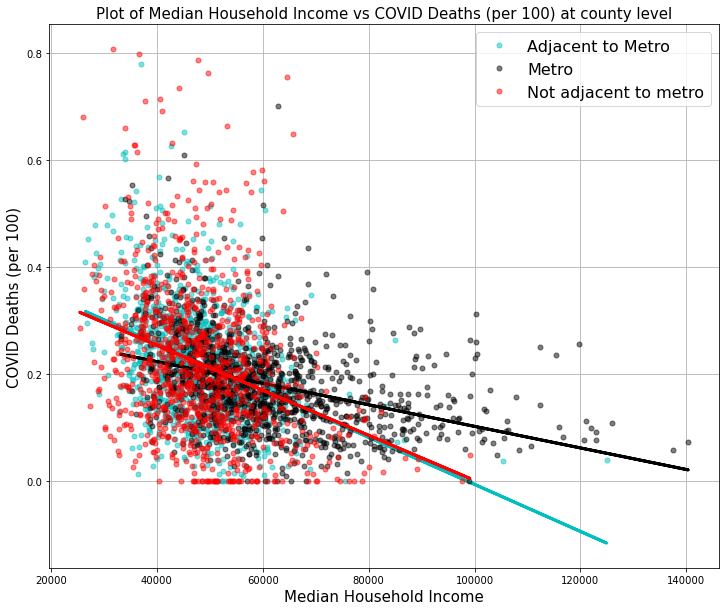

In [150]:
plt.figure(figsize=(12,10))
plt.title("Plot of Median Household Income vs COVID Deaths (per 100) at county level", fontsize = 15)
plt.xlabel("Median Household Income", fontsize = 15)
plt.ylabel("COVID Deaths (per 100)", fontsize = 15)
plt.grid(True)
colors = {'Metro':'k', 'Adjacent to Metro':'c', 'Not adjacent to metro':'r'}
groups = county_current.groupby('Metro')
for name, group in groups:
    plt.plot(group.MEDHHINC_2018, group.deaths100, color = colors[name], marker='o', linestyle='', markersize=5, label=name, alpha = 0.5)
    plt.plot(group.MEDHHINC_2018, np.poly1d(np.polyfit(group.MEDHHINC_2018, group.deaths100, 1))(group.MEDHHINC_2018), 
             color = colors[name], alpha = 1, linewidth=3)
    plt.legend(fontsize=16)
plt.show()

Counties with lower median household income may have less sophisticated medical facilities.

In [ ]:
statelonlat = pd.read_csv('data/StateLonLat.csv')
statelonlat.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-149-1949b49051b8>", line 1, in <module>
    statelonlat = pd.read_csv('data/StateLonLat.csv')
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 452, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 946, in __init__
    self._make_engine(self.engine)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 1178, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/panda

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-149-1949b49051b8>", line 1, in <module>
    statelonlat = pd.read_csv('data/StateLonLat.csv')
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 452, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 946, in __init__
    self._make_engine(self.engine)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 1178, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/hyf/opt/anaconda3/lib/python3.8/site-packages/panda

In [148]:
mergeCovState2 = pd.merge(state_ts, statelonlat, how='left', on = 'state')
mergeCovState2['deathPer100'] = mergeCovState2.deaths/mergeCovState2.population*100

ERROR! Session/line number was not unique in database. History logging moved to new session 77


In [ ]:
mergeCovState2["daylastdigit"] = mergeCovState2['date'].apply(lambda x: x[-1] == "0")
mrgeCovState10days = mergeCovState2[mergeCovState2["daylastdigit"]]
mrgeCovState10days.head()

In [ ]:
mrgeCovState10days.columns

In [ ]:
fig = px.scatter_geo(mergeCovState10days, lon = "longitude", lat = "latitude", hover_name='state', size="casePer100",
               animation_frame="date", projection='albers usa')
fig.show()

In [ ]:
fig = px.scatter_geo(mergeCovState10days, lon = "longitude", lat = "latitude", hover_name='state', size="deathPer100",
               animation_frame="date", projection='albers usa')
fig.show()

In [ ]:
county_ts["daylastdigit"] = county_ts['date'].apply(lambda x: (x[-1] == "0") | (x[-1] == "5") )
county_ts['casePer100'] = county_ts.cases/county_ts.population*100
county_ts['deathPer100'] = county_ts.deaths/county_ts.population*100
county_ts5days = county_ts[county_ts["daylastdigit"]]
county_ts5days.head()

In [ ]:
fig = px.scatter_geo(county_ts5days, lon = "long_x", lat = "lat_x", hover_name='county_x', size="casePer100",
               animation_frame="date", projection='albers usa', color = "Rural-urban_Continuum_Code_2013")
fig.update_layout(
    legend=dict(
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=9,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)
fig.show()

Pandemic first breakout in metro areas on the Eastern and southern part of US. Then, it starts spreading to non-metro areas.

In [ ]:
fig = px.scatter_geo(county_ts5days, lon = "long_x", lat = "lat_x", hover_name='county_x', size="deathPer100",
               animation_frame="date", projection='albers usa', color = "Rural-urban_Continuum_Code_2013")
fig.update_layout(
    legend=dict(
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=9,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)
fig.show()